# Twitter Sentiment Analysis

---

## 1. Business Understanding

### 1.1 Overview

In the modern digital era, social media platforms like Twitter (now X) have become powerful channels for consumers to express opinions, experiences, and emotions about brands, products, and services. These views can significantly influence purchasing decisions, brand reputation, and marketing strategies.

Manually tracking and interpreting this vast, unstructured feedback is impractical for companies. As a result, organizations increasingly turn to **Natural Language Processing (NLP)** and **machine learning models** to automatically analyze and interpret tweet sentiments.

![NLP Diagram](nlp.image.png)
*Figure 1: Illustration of how Natural Language Processing (NLP) processes and classifies text to produce outputs.*

---

### 1.2 Business Problem

Businesses need to understand **how customers feel** about their products and brands in real time. However, the sheer volume and unstructured nature of tweets make manual analysis impossible.

The core challenge is to **automatically classify each tweet** as **positive**, **negative**, or **neutral**. This provides actionable insights to:

- Identify emerging trends in customer satisfaction or dissatisfaction.
- Track public reactions to product launches or campaigns.
- Inform data-driven marketing and customer engagement decisions.

---

### 1.3 Project Objective

**Main Objective:**  
To **develop an automated sentiment classification model** that accurately analyzes and categorizes sentiments expressed in posts on **X (formerly Twitter)** as **positive, negative, or neutral**, enabling real-time insights into customer perceptions of a brand to support **data-driven marketing** and **brand management decisions**.

**Specific Objectives:**  

1. **Build a Binary Classification Model:**  
   Develop and train a machine learning model to accurately distinguish between **positive** and **negative** sentiments in X posts.  

2. **Extend to Multiclass Classification:**  
   Enhance the model to classify posts into **three categories**:  
   - No emotion toward brand or product (Neutral)
   - Positive emotion  
   - Negative emotion  
   This should be done **while maintaining or improving overall classification performance**.

3. **Support Business Decision-Making:**  
   Deliver **interpretable sentiment insights** to marketing teams and brand managers to:  
   - Optimize campaigns  
   - Address customer concerns  
   - Enhance brand reputation  

---

### 1.4 Business Value

An accurate sentiment analysis system delivers substantial value to decision-makers by enabling:

- **Brand Monitoring**: Track customer feelings about the brand over time.  
- **Marketing Optimization**: Pinpoint campaigns that drive positive engagement or negative feedback.  
- **Customer Insights**: Uncover pain points or drivers of satisfaction.  
- **Faster Decision-Making**: Provide near real-time feedback analysis.  

---

### 1.5 Research Questions

1. **How do customers feel about the company’s products or services**, based on sentiments expressed on Twitter?  
2. **What key factors or topics drive positive and negative sentiments** toward the brand on Twitter?  
3. **How can Twitter sentiment insights support business decisions**, such as marketing strategies, customer engagement, and brand reputation management?

---

### 1.6 Success Criteria

The project's success will be measured by:

1. **Actionable Insights**: The system delivers meaningful customer opinion trends on Twitter, supporting data-driven decisions.  
2. **Brand Reputation Tracking**: Enables real-time monitoring of public sentiment, allowing timely responses to issues.  
3. **Marketing and Engagement Impact**: Insights improve strategies, engagement, and brand perception based on identified trends.


## 2. DATA UNDERSTANDING

**2.1 Data Source**
* The dataset used for this analysis is a text data from CrowdFlower via data.world (https://data.world/crowdflower/brands-and-product-emotions).
* It consist of over 9,000 tweets. 

**2.2 Dataset Description**
* Each record(row) in the dataset represents a single tweet text about products from companies like Apple and Google.
* Before any preprocessing the columns in the dataset consist of object data types
* The key columns in the dataset are:
  1. "tweet_text"	- representing the actual text of the tweet
  2. "emotion_in_tweet_is_directed_at" - representing the company the emotion is directed towards (eg iPhone, Google, iPad)
  3. "is_there_an_emotion_directed_at_a_brand_or_product" - The sentiment label, it shows whether a tweet is positive, negative or none

**2.3 Data Quality**
* There is 1 missing value in the "tweet_text" column
* There are 5802 missing values in "emotion_in_tweet_is_directed_at" column.
* The dataset is text-heavy, so preprocessing steps like text cleaning, tokenization, and vectorization (TF-IDF) are required before modeling.

**2.4 Features & Target**
* Features: The main feature is the "tweet text", which will be transformed into numerical form using text vectorization technique.
* Target Variable: "is_there_an_emotion_directed_at_a_brand_or_product" is the target column, representing the tweet’s sentiment (positive, negative, or neutral).


**We aim to predict how people feel(positive, negative, neutral) towards Apple and Google products based on the tweet content.**

## 3. DATA PREPARATION

In [38]:
# Load the data
import pandas as pd
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="ISO-8859-1")
df.head(7)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product


In [39]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [40]:
# check the shape of dataset
df.shape

(9093, 3)

In [41]:
# check the unique values in "emotion_in_tweet_is_directed_at" column
df["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [42]:
# check the unique values in "is_there_an_emotion_directed_at_a_brand_or_product" column
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

## 3.1. Data Cleaning 

In [43]:
# check for nall values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [44]:
# drop the missing value in the "text" column
df = df.dropna(subset=["tweet_text"])

In [45]:
# Drop "emotion_in_tweet_is_directed_at" column
df = df.drop(columns=["emotion_in_tweet_is_directed_at"])

In [46]:
# confirm that there are no NaNs
df.isna().sum()

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [47]:
# check for duplicates
df.duplicated().sum()

22

* There are 22 duplicates in the dataset. These duplicates were droped to avoid bias and to ensure each tweet contribute unique information to the model.

In [48]:
# dropping all duplicates
df=df.drop_duplicates()


In [49]:
# confirm that there are 0 duplicates
df.duplicated().sum()

0

* Perform Data Cleaning and Exploratory Data Analysis with nltk to remove unnecessary characters and noise so that our models only learn from meaningful information.
* Common data cleaning tasks to be considered are Standardizing Case & Tokenizing.

In [50]:
# random example from "tweet_text" column
df["tweet_text"][20]

"Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?"

In [51]:
# importing relevant imports
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
  
    text = re.sub(r"http\S+", "", text)             # Remove URLs
    text = re.sub(r"@\w+", "", text)                # Remove mentions (eg @user)
    text = re.sub(r"#\w+", "", text)                # Remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)            # Remove punctuation, numbers, and special characters
    text = re.sub(r"\s+", " ", text).strip()        # Remove extra spaces
    
    
    # Tokenize (splits text into words)
    tokens = word_tokenize(text)
    
    # Removes stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Lemmatize each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join back into a single string
    text = " ".join(tokens)
    
    return text

In [53]:
# apply the cleaned preprocesssed function to new column "cleaned_tweet""
df["cleaned_tweet"] = df["tweet_text"].apply(preprocess_text)

In [54]:
df.head(7)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,iphone hr tweeting dead need upgrade plugin st...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff fri marissa mayer google tim oreil...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product,new ipad apps communication showcased conference
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion,starting around corner hop skip jump good time...


## **EDA**

* Checking the most common words in the "cleaned tweet" column

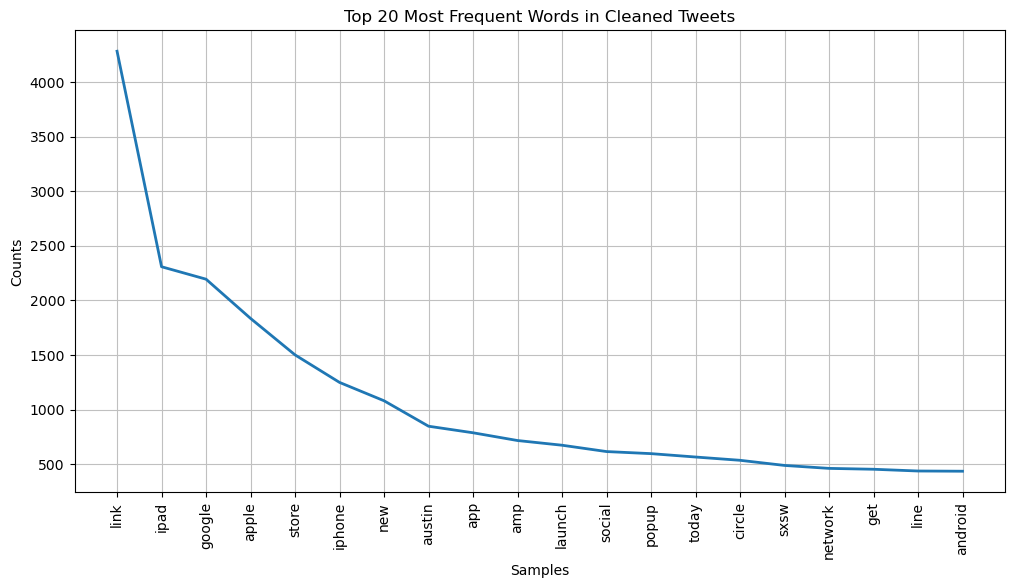

In [55]:

# Combine all cleaned tweets
all_cleaned_words = ' '.join(df['cleaned_tweet'].astype(str))
tokens_clean = nltk.word_tokenize(all_cleaned_words)

# instantiate frequency distribution
freqdist_clean = FreqDist(tokens_clean)

# plot
plt.figure(figsize=(12,6))
freqdist_clean.plot(20, title="Top 20 Most Frequent Words in Cleaned Tweets")
plt.show()

* Checking the class distribution of the target column

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64


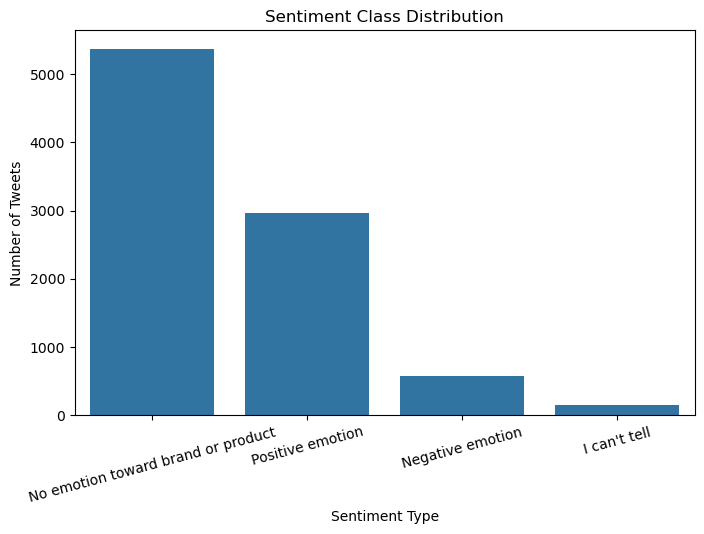

In [56]:
# count unique values in 'is_there_an_emotion_directed_at_a_brand_or_product' column
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Print the counts
print(sentiment_counts)

# Create a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Tweets")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=15)

plt.show()


* There is a class imbalance in the "is_there_an_emotion_directed_at_a_brand_or_product" column, with "No emotion toward brand or product" having 
the most number of tweets followed by Positive emotion then Negative emotion. 

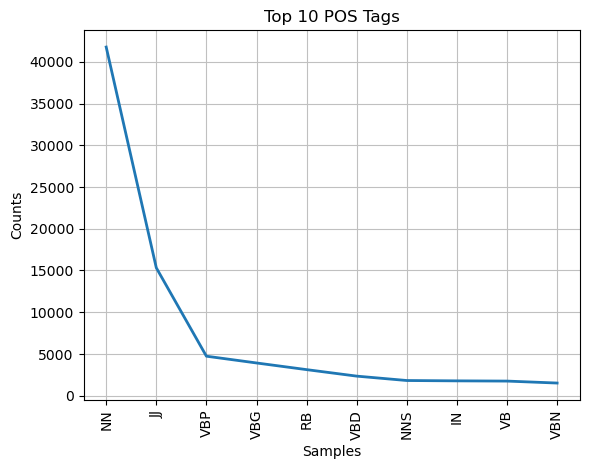

<Axes: title={'center': 'Top 10 POS Tags'}, xlabel='Samples', ylabel='Counts'>

In [57]:
# Part-of-Speech (POS) Tagging
pos_tags = nltk.pos_tag(tokens_clean)
pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
pos_counts.plot(10, title="Top 10 POS Tags")

* Most cleaned tweets are Noun(singular), followed by Adjective

In [58]:
from nltk import bigrams, trigrams
from collections import Counter

# checking for top 10 common bigrams and trigrams words in the dataset
bi_grams = Counter(bigrams(tokens_clean))
tri_grams = Counter(trigrams(tokens_clean))

print("Top 10 Bigrams:", bi_grams.most_common(10))
print("Top 10 Trigrams:", tri_grams.most_common(10))


Top 10 Bigrams: [(('apple', 'store'), 548), (('social', 'network'), 446), (('new', 'social'), 408), (('popup', 'store'), 332), (('network', 'called'), 318), (('link', 'google'), 311), (('google', 'launch'), 299), (('today', 'link'), 299), (('link', 'via'), 293), (('called', 'circle'), 289)]
Top 10 Trigrams: [(('new', 'social', 'network'), 379), (('social', 'network', 'called'), 317), (('network', 'called', 'circle'), 285), (('major', 'new', 'social'), 284), (('launch', 'major', 'new'), 277), (('google', 'launch', 'major'), 243), (('called', 'circle', 'possibly'), 218), (('circle', 'possibly', 'today'), 217), (('possibly', 'today', 'link'), 213), (('store', 'downtown', 'austin'), 154)]


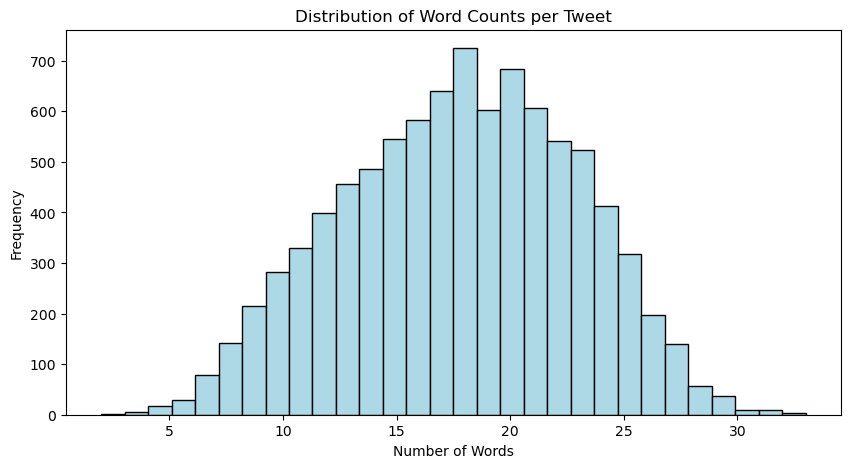

In [59]:
# word counts in the unclean tweet_text column
df['char_count'] = df['tweet_text'].apply(len)
df['word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
plt.hist(df['word_count'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribution of Word Counts per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

* Most uncleaned tweet text have around 18 words

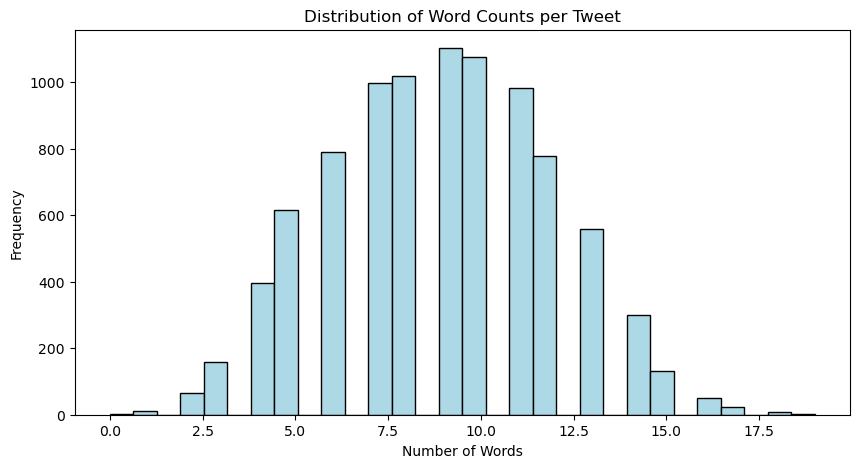

In [60]:
# word counts on cleaned tweets
df['cleaned_word_count'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
plt.hist(df['cleaned_word_count'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribution of Word Counts per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

* Most cleaned tweet text have around 10 words

## MODELING

For this analysis we are going to perform both **Binary and Multi-class classification task**, to predict the sentiment of tweets based on their text content by building 3 different models namely Logistic Regression, Random Forest and XGBoost classifier.

### Binary Classification

In [61]:
# relevant imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [62]:
# create a new column Binary target
df['binary_target'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
}) 

* Drop rows where sentiments is missing in the binary_target column then split the dataset into training and testing sets

In [63]:
# Keep only rows that have binary labels
df_binary = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# drop rows where sentiments is missing
df_binary = df.dropna(subset=['binary_target'])

X = df_binary["cleaned_tweet"]    
y = df_binary["binary_target"]    

 #  Split the data into 80% training and 20% testing. stratify=y ensures both classes are balanced in train and test sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [64]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression pipeline
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

#  parameter grid
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# GridSearchCV
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1, scoring='f1_macro', verbose=2)

# Fit model
grid_lr.fit(X_train_binary, y_train_binary)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000,
                                                        stop_words='english')),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'liblinear']},
             scoring='f1_macro', verbose=2)

In [65]:
# Predict
y_pred_lr = grid_lr.best_estimator_.predict(X_test_binary)

In [66]:
print("Best Logistic Regression Params:", grid_lr.best_params_)


Best Logistic Regression Params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [67]:

# Random Forest pipeline
pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))])

 # parameter grid
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
 # GridsearchCV then fit the model
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, scoring='f1_macro', verbose=2)
grid_rf.fit(X_train_binary, y_train_binary)

print("Best Random Forest Params:", grid_rf.best_params_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [68]:
# Predict
y_pred_rf = grid_rf.best_estimator_.predict(X_test_binary)

In [69]:
from xgboost import XGBClassifier
# xgboost pipeline
pipe_xgb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))])

# parameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.8, 1]}

# GridsearchCV then fit the model
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='f1_macro', verbose=2)
grid_xgb.fit(X_train_binary, y_train_binary)

print("Best XGB Params:", grid_xgb.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1}


In [92]:
# Predict
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_binary)


 Results for Logistic Regression (Binary)
 Accuracy: 0.8729
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61       114
         1.0       0.92      0.92      0.92       594

    accuracy                           0.87       708
   macro avg       0.76      0.76      0.76       708
weighted avg       0.87      0.87      0.87       708



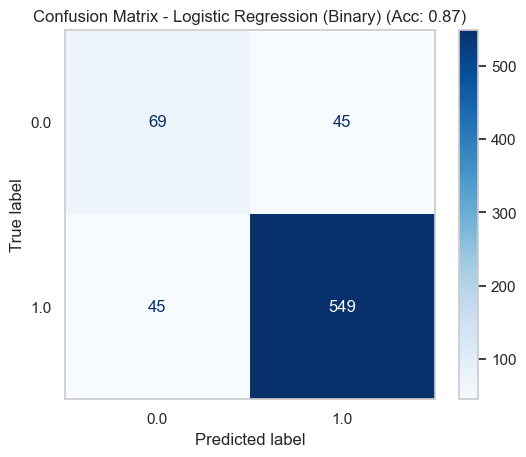


 Results for Random Forest (Binary)
 Accuracy: 0.8870
              precision    recall  f1-score   support

         0.0       0.79      0.40      0.53       114
         1.0       0.90      0.98      0.94       594

    accuracy                           0.89       708
   macro avg       0.84      0.69      0.74       708
weighted avg       0.88      0.89      0.87       708



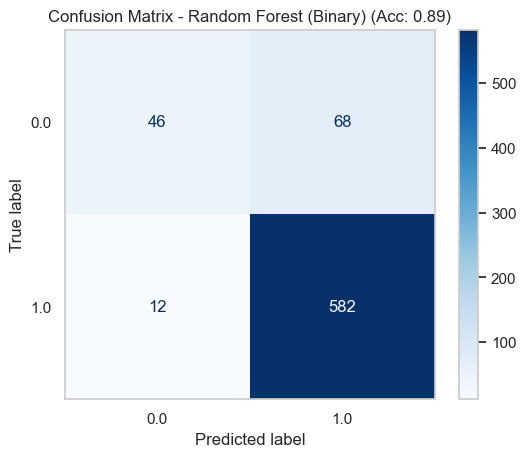


 Results for XGBoost (Binary)
 Accuracy: 0.8729
              precision    recall  f1-score   support

         0.0       0.65      0.45      0.53       114
         1.0       0.90      0.95      0.93       594

    accuracy                           0.87       708
   macro avg       0.78      0.70      0.73       708
weighted avg       0.86      0.87      0.86       708



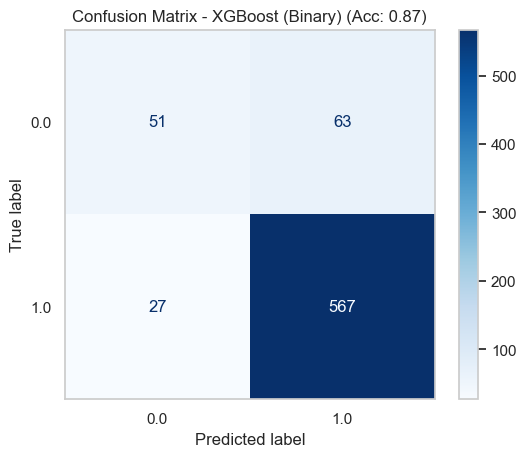

In [94]:
# Binary Class Evaluation 
def evaluate_model(name, y_test_binary, y_pred):
    acc = accuracy_score(y_test_binary, y_pred)
    print(f"\n Results for {name}")
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test_binary, y_pred))
    
    cm = confusion_matrix(y_test_binary, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test_binary.unique()))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name} (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()
   
# Evaluating both models for binary class
evaluate_model("Logistic Regression (Binary)", y_test_binary, y_pred_lr)
evaluate_model("Random Forest (Binary)", y_test_binary, y_pred_rf)
evaluate_model("XGBoost (Binary)", y_test_binary, y_pred_xgb)

* **Binary Classification Evaluation**

1. Logistic Regression; 
* The model correctly classified 549 positive tweets as  positive 
* The model correctly classified 69 negative tweets as  negative 
* The model wrongly classified 45 negative tweets as  a positive tweet
* The model wrongly detects 45 positive tweets as a negative tweet
* An accuracy of 87%. The model performs well at classifying positive tweets than negative tweets.

2. Random Forest;
* The model correctly classified 582 positive tweets as  positive tweet
* The model correctly classified 46 negative tweets as  negative tweet
* The model wrongly classified 68 negative tweets as  positive tweet
* The model wrongly classified 12 positive tweets as  negative tweet
* An accuracy of 88%. The RF model has improved the performance in classifying positive sentiments, but with a lower performance at detecting negative 
sentiments

3. XGBoost;
* The model correctly classified 567 positive tweets as  positive tweet
* The model correctly detected 51 negative tweets as  negative tweet
* The model wrongly classified 63 negative tweets as  positive tweet
* The model wrongly classified 27 positive tweets as  negative tweet
* With an accuracy of 87%. 
* **All these models performed well at classitying positive tweets, but slightly poor at detecting negative tweets**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score  

# Models performance comparison
models = {"Logistic Regression": y_pred_lr,
          "Random Forest": y_pred_rf,
          "XGBoost": y_pred_xgb}

# Calculate metrics
metrics = {}
for name, y_pred in models.items():
    metrics[name] = [accuracy_score(y_test_multi, y_pred),
                     f1_score(y_test_multi, y_pred, average='macro'),
                     f1_score(y_test_multi, y_pred, average='weighted')]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=list(metrics.values()))
            
plt.xticks(ticks=[0,1,2], labels=["Accuracy", "F1 Macro", "F1 Weighted"])
plt.title("Multi-Class Model Performance Comparison")
plt.legend(models.keys())
plt.ylim(0,1)
plt.show()

### Multi-class classification

In [72]:
df.head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet,char_count,word_count,cleaned_word_count,binary_target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,iphone hr tweeting dead need upgrade plugin st...,127,23,8,0.0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know awesome ipadiphone app youll likely appre...,139,22,12,1.0
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,wait also sale,79,15,3,1.0
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,hope year festival isnt crashy year iphone app,82,15,8,0.0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff fri marissa mayer google tim oreil...,131,17,14,1.0


In [73]:
# creating new column multiclass target
df['multiclass_target'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 2,
    'No emotion toward brand or product': 0,
    'I can’t tell': 0
})

In [74]:
df['multiclass_target'].value_counts()

multiclass_target
0.0    5375
1.0    2970
2.0     569
Name: count, dtype: int64

In [76]:
# Droping Nans in 'multiclass_target' column
df_multi = df.dropna(subset=['multiclass_target'])

#Features and target
X_multi = df_multi['cleaned_tweet']
y_multi = df_multi['multiclass_target']

# Train test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split( X_multi, y_multi, test_size=0.2, stratify=y_multi, random_state=42)
   


In [77]:
# Logistic Regression
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(multi_class='multinomial', max_iter=1000))
])

# parameter grid
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'saga']}


# perform GridsearchCV then fit
gridsearch_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gridsearch_lr.fit(X_train_multi, y_train_multi)
# getting prediction from the model
y_pred_LR = gridsearch_lr.best_estimator_.predict(X_test_multi)


print("Logistic Regression Accuracy:", accuracy_score(y_test_multi, y_pred_LR))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Logistic Regression Accuracy: 0.659562535053281


In [78]:
# Random Forest
pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
]) 
# parameter grid
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]}
    
# GridSearchCV
gridsearch_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
gridsearch_rf.fit(X_train_multi, y_train_multi)

# Predict on test data
y_pred_RF = gridsearch_rf.best_estimator_.predict(X_test_multi)

# Evaluate
acc = accuracy_score(y_test_multi, y_pred_RF)
print("Random Forest Accuracy:", acc)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Accuracy: 0.6803140773976444


In [79]:
# XGBoost
pipe_xgb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(eval_metric='mlogloss', objective='multi:softmax', num_class=3, random_state=42))
])
# parameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1]
}

# GridSearchCV
gridsearch_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
    
# Fit on training data
gridsearch_xgb.fit(X_train_multi, y_train_multi)

# Predict on test data
y_pred_XGB = gridsearch_xgb.best_estimator_.predict(X_test_multi)

# Evaluate
acc = accuracy_score(y_test_multi, y_pred_XGB)
print("XGBoost Accuracy:", acc)    
    
      

Fitting 3 folds for each of 24 candidates, totalling 72 fits
XGBoost Accuracy: 0.6775098149186763



Logistic Regression - Accuracy: 0.6596
              precision    recall  f1-score   support

     Neutral       0.77      0.70      0.73      1075
    Negative       0.59      0.62      0.61       594
    Positive       0.32      0.53      0.40       114

    accuracy                           0.66      1783
   macro avg       0.56      0.61      0.58      1783
weighted avg       0.68      0.66      0.67      1783



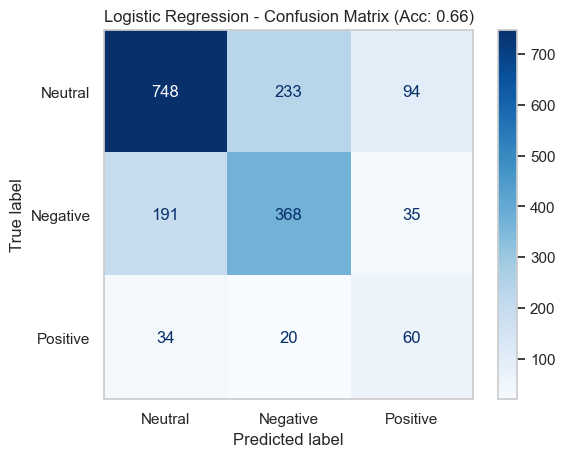


Random Forest - Accuracy: 0.6803
              precision    recall  f1-score   support

     Neutral       0.72      0.79      0.76      1075
    Negative       0.59      0.54      0.57       594
    Positive       0.61      0.33      0.43       114

    accuracy                           0.68      1783
   macro avg       0.64      0.56      0.58      1783
weighted avg       0.67      0.68      0.67      1783



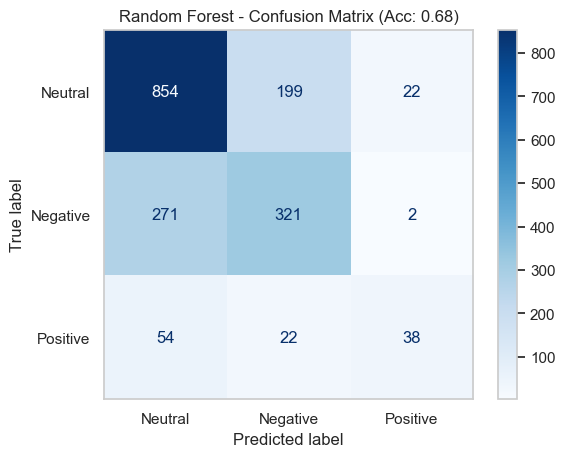


XGBoost - Accuracy: 0.6775
              precision    recall  f1-score   support

     Neutral       0.71      0.82      0.76      1075
    Negative       0.62      0.49      0.55       594
    Positive       0.49      0.31      0.38       114

    accuracy                           0.68      1783
   macro avg       0.61      0.54      0.56      1783
weighted avg       0.67      0.68      0.67      1783



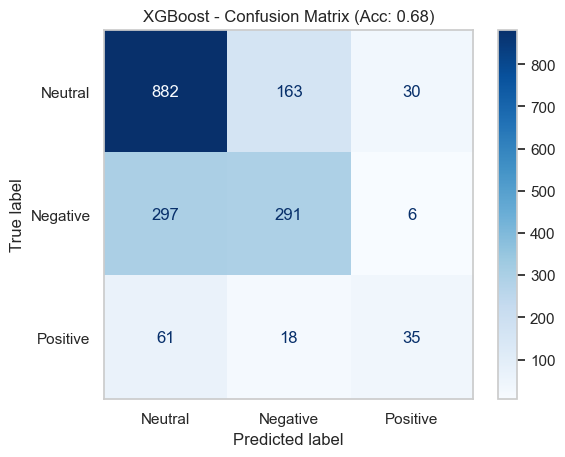

In [91]:

# Evaluation funtion for the multiclass classification

    
def evaluate_multiclass_model(name, y_test_multi, y_pred):
    acc = accuracy_score(y_test_multi, y_pred)
    print(f"\n{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test_multi, y_pred, target_names=['Neutral', 'Negative', 'Positive']))
    
    ConfusionMatrixDisplay.from_predictions(
        y_test_multi, y_pred, display_labels=['Neutral', 'Negative', 'Positive'], cmap='Blues'
    )
    plt.title(f"{name} - Confusion Matrix (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()

# Evaluating both models in the classification task
evaluate_multiclass_model("Logistic Regression", y_test_multi, y_pred_LR)
evaluate_multiclass_model("Random Forest", y_test_multi, y_pred_RF)
evaluate_multiclass_model("XGBoost", y_test_multi, y_pred_XGB)


* **Multi-Class Evaluation**

1. Logistic Regression; 
* The model correctly classifies 748 Neutral tweets, 368 Negative tweets and 60 positive tweets
* It sometimes confuses Neutral and Negative tweets. for example 233 Neutral tweets were wrongly classified as Negative.
* An accuracy of 66%. The model is better at identifying Neutral and Negative tweets than Positive tweets. It struggle to differentiate between 
Negative and Neutral tweets.

2. Random Forest;
* The model correctly classifies 854 Neutral tweets, 321 Negative tweets and 38 positive tweets.


3. XGBoost;
* The model correctly classifies 882 Neutral tweets, 291 Negative tweets and 35 positive tweets.
 


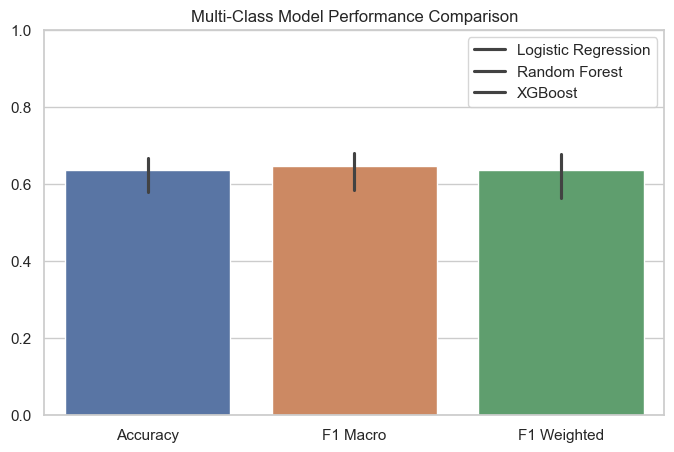

In [89]:
from sklearn.metrics import accuracy_score, f1_score  

# Models performance comparison
models = {"Logistic Regression": y_pred_LR,
          "Random Forest": y_pred_RF,
          "XGBoost": y_pred_XGB}

# Calculate metrics
metrics = {}
for name, y_pred in models.items():
    metrics[name] = [accuracy_score(y_test_multi, y_pred),
                     f1_score(y_test_multi, y_pred, average='macro'),
                     f1_score(y_test_multi, y_pred, average='weighted')]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=list(metrics.values()))
            
plt.xticks(ticks=[0,1,2], labels=["Accuracy", "F1 Macro", "F1 Weighted"])
plt.title("Multi-Class Model Performance Comparison")
plt.legend(models.keys())
plt.ylim(0,1)
plt.show()


This plot shows the comparison of the three mL models on a multi-class sentiment classification task. It shows that the Logistic Regression, 
Random Forest and XGBoost all perform almost equally in classifying sentiments.